In [55]:
%matplotlib widget
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [67]:
black = np.zeros((500, 500, 3))


In [68]:
def get_rhexagon_coords(side_length=500):
    # first create the coords with center at (0, 0)
    center = (0, 0)
    
    # angle with respect to x-positive axis in radians 
    angle = 0
    angle_offset = np.radians(60)
    points = []
    for i in range(6):
        points.append((side_length * np.sin(angle), side_length * np.cos(angle)))
        angle += angle_offset
        
    # offset the points so that there are no negative points
    points = np.array(points)
    print(points.min(axis=0))
    points += np.abs(points.min(axis=0))
        
    return points.astype(int)

In [69]:
get_rhexagon_coords()

[-433.01270189 -500.        ]


array([[ 433, 1000],
       [ 866,  750],
       [ 866,  250],
       [ 433,    0],
       [   0,  249],
       [   0,  749]])

In [70]:
black[tuple(get_rhexagon_coords(100).T)] = [255, 255, 255]

[ -86.60254038 -100.        ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


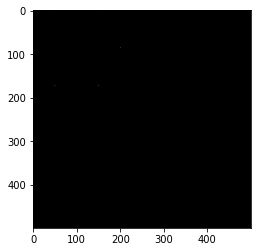

In [71]:
plt.imshow(black)
plt.show();

In [160]:
hex_pic_path = "../imgs/hexagon_low.jpeg"
hexagon= plt.imread(hex_pic_path) 

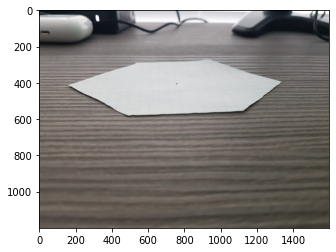

In [161]:
plt.imshow(hexagon)
plt.show()

In [192]:
vertices = np.array([(1125, 559), (489, 585), (164, 420), (544, 287), (940, 270), (1333, 397)])
vertices = np.array([vertices[:, 0], vertices[:, 1]]).T
vertices = np.array([[y, x] for (x, y) in vertices])
vertices

array([[ 559, 1125],
       [ 585,  489],
       [ 420,  164],
       [ 287,  544],
       [ 270,  940],
       [ 397, 1333]])

In [193]:
def order_coords(coords):
    """
    order coords first by the y coord then by the x coord
    """
    idxs = np.argsort(coords[:, 0])
    coords = coords[idxs]
    
    for i in range(3):
        i *= 2
        if coords[i][1] > coords[i+1][1]:
            temp = coords[i].copy()
            coords[i] = coords[i+1]
            coords[i+1] = temp
    return coords

[-433.01270189 -500.        ]


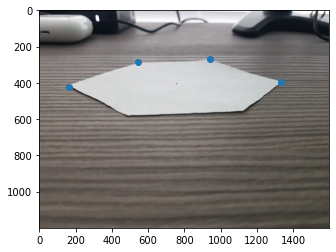

In [207]:
coords = order_coords(vertices)
r_coords = order_coords(get_rhexagon_coords())
plt.scatter(coords[:4, 1], coords[:4, 0])
plt.imshow(hexagon)
plt.show()

In [226]:
o =np.array( [coords[i] for i in [0,1, 2, 3]])
r = np.array([r_coords[i] for i in [0,1, 2, 3]])

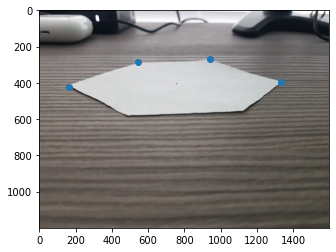

In [227]:
plt.scatter(o[:, 1], o[:, 0])
plt.imshow(hexagon)
plt.show()

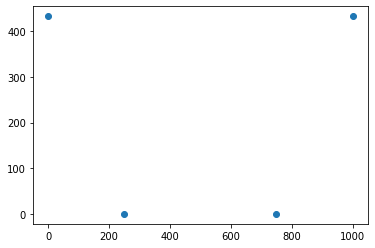

In [228]:
plt.scatter(r[:, 1], r[:, 0])
plt.show()

In [229]:
# M = cv2.getPerspectiveTransform(coords[2:6].astype(np.float32), r_coords[2:6].astype(np.float32))
# M = cv2.getPerspectiveTransform(coords[0:4].astype(np.float32), r_coords[0:4].astype(np.float32))
M = cv2.getPerspectiveTransform(o[:, ::-1].astype(np.float32), r[:, ::-1].astype(np.float32))

side_length =(r_coords[:,1].max() - r_coords[:, 1].min(), r_coords[:,0].max() - r_coords[:, 0].min())
warped = cv2.warpPerspective(hexagon, M, side_length)

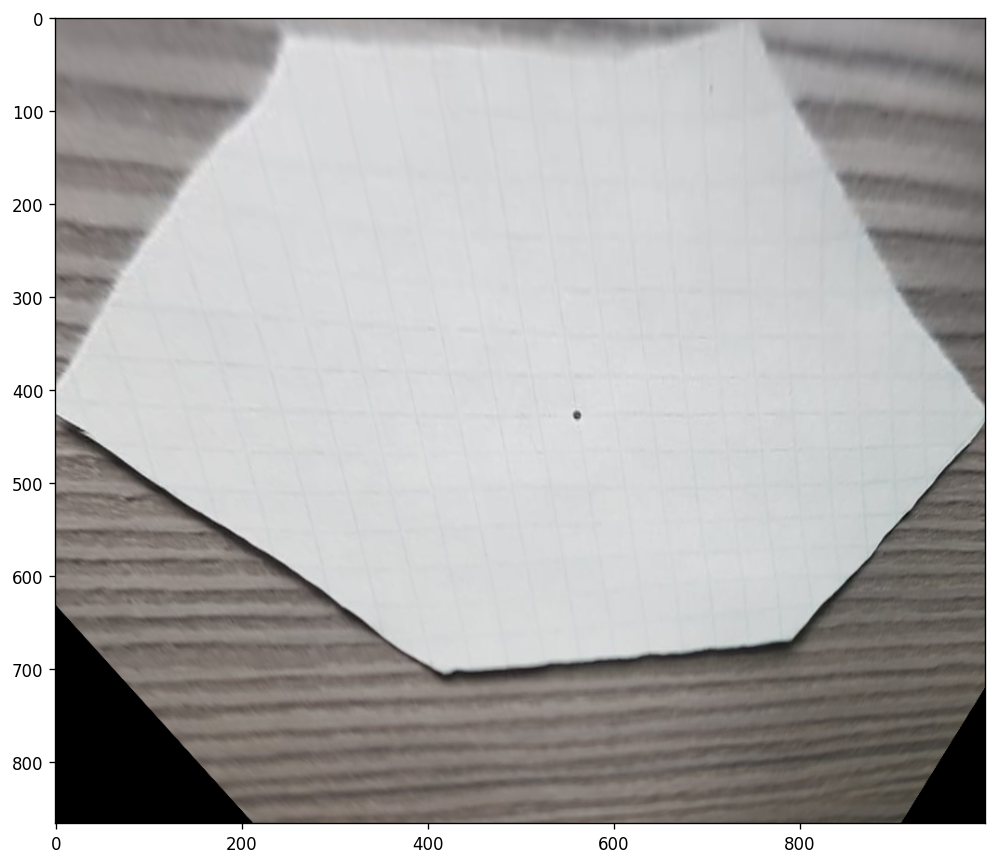

In [231]:
plt.figure(num=None, figsize=(10, 10), dpi=120, facecolor='w', edgecolor='k')

plt.imshow(warped)
plt.show()

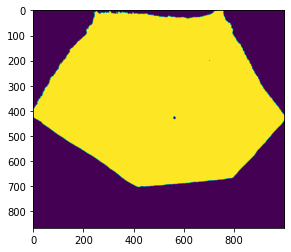

In [293]:
gt_mask = cv2.inRange(warped, (170, 170, 170), (255, 255, 255))
mask = gt_mask.copy()
plt.imshow(mask)

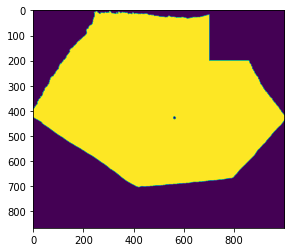

In [296]:
# put artificial "drone" in the img
mask[0:200, 700:] = 0
plt.imshow(mask)

In [297]:
mask_diffs = np.where(gt_mask != mask)

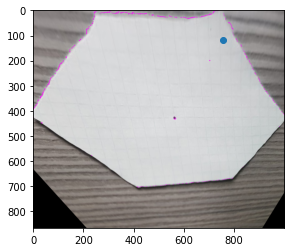

In [298]:
plt.scatter(mask_diffs[1].mean(), mask_diffs[0].mean())
plt.imshow(warped)
plt.show()